In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
import fiona
from fiona.crs import from_epsg
import pycrs
from shapely.geometry import mapping

In [2]:
# Filepaths
fp = r"C:\Users\ASMITA\Documents\Python_rasteranalysis\kawa_space\place1\data\msaviPlace1.tif"
    
out_tif = r"C:\Users\ASMITA\Documents\Python_rasteranalysis\kawa_space\place1\data\msaviPlace1clip.tif"

In [3]:
data = rasterio.open(fp)

In [5]:
with fiona.open("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place1/data/place1_projected.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [6]:
with rasterio.open(r"C:\Users\ASMITA\Documents\Python_rasteranalysis\kawa_space\place1\data\msaviPlace1.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

In [7]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("msaviPlace1clip.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [8]:
msavi2place1 = rasterio.open(r"C:\Users\ASMITA\Documents\Python_rasteranalysis\kawa_space\place1\scripts\msaviPlace1clip.tif")

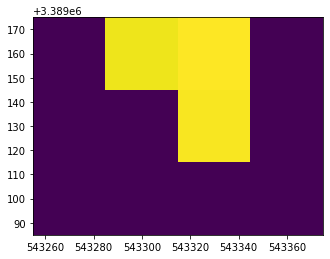

In [9]:
plot.show(msavi2place1)

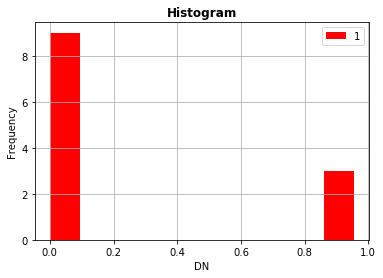

In [10]:
show_hist(msavi2place1)